### Part 2 1 code

In [113]:
#functions and code to read text for part 2
from textblob import TextBlob, Word
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from operator import itemgetter
import re
import matplotlib.pyplot as plt
import pandas as pd 
import imageio

def removeCharactersAndStopWords(wordList):
    return [re.sub('[!@#$.,0123456789?\':()/;`“”"-]', '', word) for word in wordList if word not in stopwords.words('english')]

def getTextBlobFromText(filename):
    words = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            for word in line.split():
               words.append(word.lower()) 
    return ProcessText(words)

def ProcessText(text):
    finalWordList = []
    tempWordList = []
    tempWordList = removeCharactersAndStopWords(text)
    for word in tempWordList:
        w = Word(word)
        finalWordList.append(w.lemmatize())

    #idk why I need to run again, but it was adding back 
    #stuff after lemmization and I was tired of trying to fix
    #There's a better way for sure
    finalWordList = removeCharactersAndStopWords(finalWordList)

    newBlob = TextBlob(' '.join(finalWordList))
    return newBlob

ozy = getTextBlobFromText("texts/ozymandius.txt")
aod = getTextBlobFromText("texts/armyOfDarkness.txt")
pag = getTextBlobFromText("texts/princessAndGoblin.txt")

Below are the output funtions and code for part 2 b & c

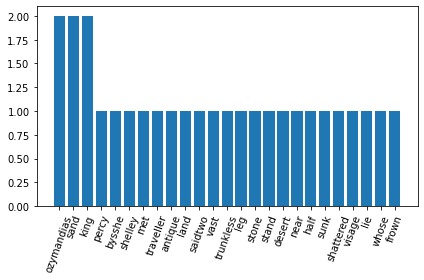

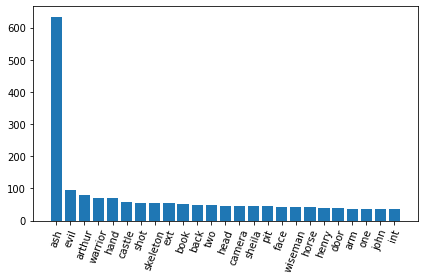

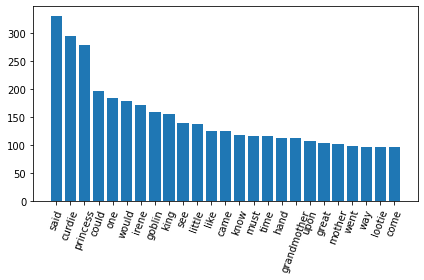

In [114]:
#output code for part 2
def PlotTop25Words(textBlob, fileName):
    wordList = []
    countList = []
    d = Counter(textBlob.word_counts)
    for w, c in d.most_common(25):
        wordList.append(w)
        countList.append(c)

    plt.bar(x=wordList, height=countList)
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.savefig(fname=fileName, facecolor='white')
    plt.show()

def GenerateCloud(maskFile, outputFile, blob, numberOfWords, colormap):
    items = blob.word_counts.items()
    sortedItems = sorted(items, key=itemgetter(1), reverse=True)
    topWords = []
    for word in sortedItems[:numberOfWords]:
        topWords.append(word[0]) 

    mask_image = imageio.imread(maskFile)

    wordCloud = WordCloud(width=1000, height=1000, colormap=colormap, mask=mask_image, background_color='white')
    wordCloud.generate(' '.join(topWords))
    wordCloud = wordCloud.to_file(outputFile)

PlotTop25Words(ozy, 'output/ozyBar.png')
PlotTop25Words(aod, 'output/aodBar.png')
PlotTop25Words(pag, 'output/pagBar.png')

GenerateCloud('masks/crab.png','output/ozyCloud.png', ozy, 100, "gist_earth")
GenerateCloud('masks/chainsaw.png','output/aodCloud.png', aod, 100, "twilight_shifted")
GenerateCloud('masks/crown.png','output/pagCloud.png', pag, 100, "spring")

### Part 3


In [115]:
#part 3
from textatistic import Textatistic 
from pathlib import Path
import os

def calculateReadability(file):
    text = Path(file).read_text(encoding='utf-8')
    readability = Textatistic(text)

    %precision 3
    readDict = readability.dict()
    averageScore = (readDict['fleschkincaid_score']+readDict['gunningfog_score']+readDict['smog_score']+readDict['dalechall_score'])/4
    print("The Average Score for", os.path.basename(file)," is:", round(averageScore, 2))

calculateReadability('texts/ozymandius.txt')
calculateReadability('texts/princessAndGoblin.txt')
calculateReadability('texts/armyOfDarkness.txt')


The Average Score for ozymandius.txt  is: 6.94
The Average Score for princessAndGoblin.txt  is: 6.11
The Average Score for armyOfDarkness.txt  is: 4.19


### Part 4


In [116]:
#part 4
import spacy

nlplg = spacy.load('en_core_web_lg')

def compareTexts(text1, text2, text3):
    document1 = nlplg(Path(text1).read_text(encoding='utf-8'))
    document2 = nlplg(Path(text2).read_text(encoding='utf-8'))
    document3 = nlplg(Path(text3).read_text(encoding='utf-8'))
    docsimA = document1.similarity(document2)
    docsimB = document2.similarity(document3)
    docsimC = document3.similarity(document1)
    print('Similarity for', os.path.basename(text1), "to", os.path.basename(text2),"is", round(docsimA,3))
    print('Similarity for', os.path.basename(text2), "to", os.path.basename(text3),"is", round(docsimB,3))
    print('Similarity for', os.path.basename(text3), "to", os.path.basename(text1),"is", round(docsimC,3))

compareTexts('texts/princessAndGoblin.txt', 'texts/ozymandius.txt', 'texts/armyOfDarkness.txt')


Similarity for princessAndGoblin.txt to ozymandius.txt is 0.955
Similarity for ozymandius.txt to armyOfDarkness.txt is 0.948
Similarity for armyOfDarkness.txt to princessAndGoblin.txt is 0.958


### Part 5

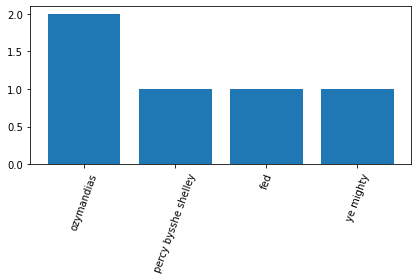

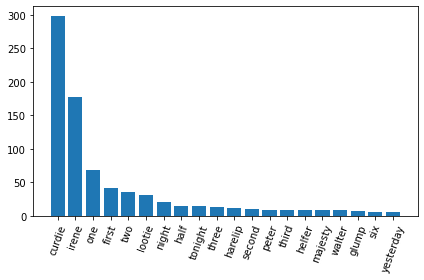

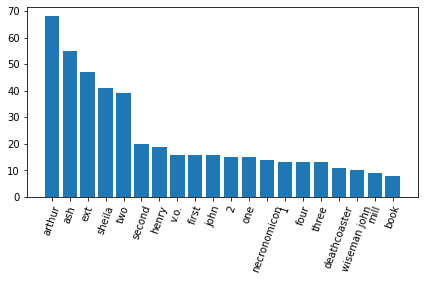

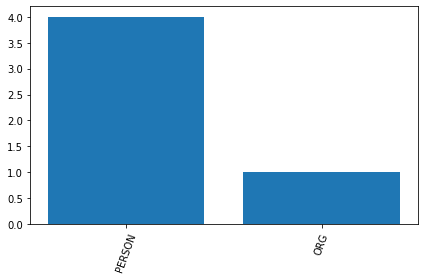

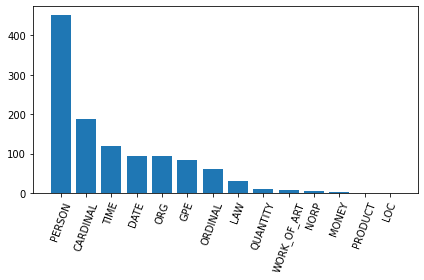

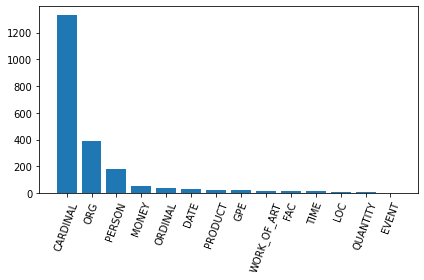

In [125]:
#part 5

def PlotBarEntityName(text, fileOutput):
    entityCounts = {}
    document = nlplg(Path(text).read_text(encoding='utf-8'))
    #convert list to dict for easy counting
    for entity in document.ents:
        if entity.text.strip().lower() in entityCounts:
            entityCounts[entity.text.strip().lower()] += 1
        else:
            entityCounts[entity.text.strip().lower()] = 1

    items = entityCounts.items()
    sortedItems = sorted(items, key=itemgetter(1), reverse=True)
    topWords = []
    for word in sortedItems[:20]:
        topWords.append(word[0]) 

    plt.bar(x=topWords, height=[entityCounts[k] for k in topWords])
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.savefig(fname=fileOutput, facecolor='white')
    plt.show()
    
def PlotBarEntityType(text, fileOutput):
    entityCounts = {}
    document = nlplg(Path(text).read_text(encoding='utf-8'))
    
    #convert list to dict for easy counting
    for entity in document.ents:
        if entity.label_ in entityCounts:
            entityCounts[entity.label_] += 1
        else:
            entityCounts[entity.label_] = 1

    items = entityCounts.items()
    sortedItems = sorted(items, key=itemgetter(1), reverse=True)
    topWords = []
    for word in sortedItems[:20]:
        topWords.append(word[0]) 

    plt.bar(x=topWords, height=[entityCounts[k] for k in topWords])
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.savefig(fname=fileOutput, facecolor='white')
    plt.show()

PlotBarEntityName('texts/ozymandius.txt', 'output/ozyEntNameCount.png')
PlotBarEntityName('texts/princessAndGoblin.txt', 'output/pagEntNameCount.png')
PlotBarEntityName('texts/armyOfDarkness.txt', 'output/aodEntNameCount.png')

PlotBarEntityType('texts/ozymandius.txt', 'output/ozyEntTypeCount.png')
PlotBarEntityType('texts/princessAndGoblin.txt', 'output/pagEntTypeCount.png')
PlotBarEntityType('texts/armyOfDarkness.txt', 'output/aodEntTypeCount.png')

